<a href="https://colab.research.google.com/github/mingeydacoder/PC/blob/main/week8_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1

In [5]:
!pip install netCDF4
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 48.8 MB/s eta 0:00:00


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Fri Oct 16 23:43:07 2020: cdo -f nc copy -sellonlatbox,90,160,-10,55 /data/C.shaoyu/LSM2020/forstudy/composite/ERA5_link/MSL/ERA5_MSL_2016_01_07.nc /data/C.shaoyu/LSM2020/forstudy/composite/ERA5_mini/MSL/2016/ERA5_MSL_2016_01_07.nc
    _NCProperties: version=2,netcdf=4.6.3,hdf5=1.10.5
    CDO: Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): time(1), lon(281), lat(261)
    variables(dimensions): float64 time(time), float64 lon(lon), float64 lat(lat), float32 psl(time, lat, lon)
    groups: 
(261, 281)


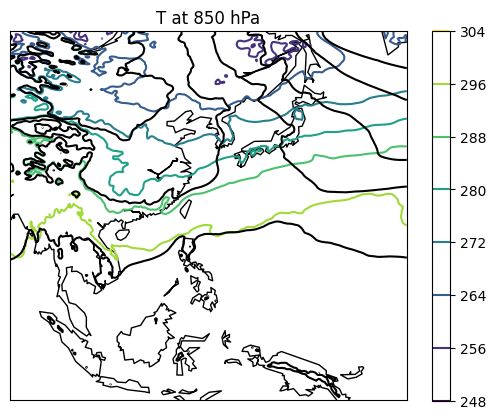

In [5]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap


rootgrp = nc.Dataset('ERA5_T_2016_01_07.nc')
MSLP = nc.Dataset('ERA5_MSL_2016_01_07.nc')

lat = rootgrp.variables['lat'][:]
lon = rootgrp.variables['lon'][:]
plev = rootgrp.variables['plev'][:]


print(MSLP)

# find and plot the filled contour of global temperature at first time step at 850 hPa level
t = rootgrp.variables['ta'][0,0,:,:] # first time step (0), all lat/lon (:)
print(t.shape)

psl = MSLP.variables['psl'][0,:,:]

m = Basemap(projection='cyl',llcrnrlat=-10, llcrnrlon=90,urcrnrlat=55, urcrnrlon=160)

m.drawcoastlines()   #畫海岸線

CS=plt.contour(lon,lat,t)
a=plt.contour(lon,lat,psl,colors='black')
plt.colorbar(CS,orientation='vertical')
plt.title('T at 850 hPa')
plt.show()